# **Assignment 3**

Penguin Classification Analysis


***-- Sri Sai Ratna Abhishek Kosuri 21BCE7141***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [8]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)


In [9]:
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)
df['sex'].fillna(df['sex'].mode(),inplace =True)

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [12]:
df.species.nunique()

3

In [13]:
df.island.nunique()

3

In [14]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [15]:
df['sex'] = df['sex'].str.replace('[.]', '')

replace = df['sex'].fillna(df["sex"].mode(), inplace=True)

<ipython-input-15-f521ba1c2c1d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sex'] = df['sex'].str.replace('[.]', '')


In [16]:
df.sex.value_counts()

MALE      168
FEMALE    165
            1
Name: sex, dtype: int64

In [17]:
df = df.replace('', np.NaN)
replace = df.fillna(df.mode(), inplace=True)

In [18]:
df.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [19]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


<ipython-input-22-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

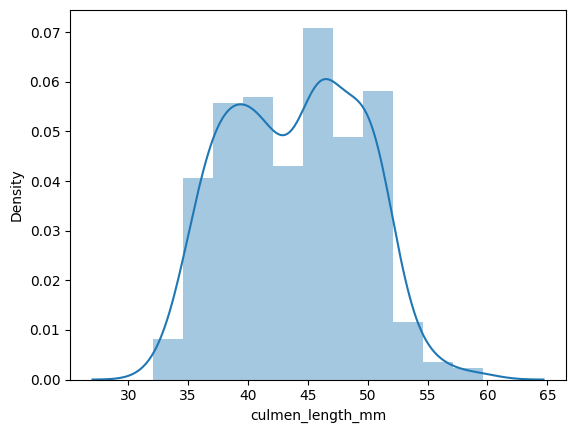

In [22]:
sns.distplot(df.culmen_length_mm)

In [22]:
sns.distplot(df.culmen_depth_mm)

In [22]:
sns.pairplot(df)

In [22]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.head()

In [22]:
sns.boxplot(df.culmen_length_mm)

In [22]:
sns.boxplot(df.culmen_depth_mm)

In [22]:
sns.boxplot(df.flipper_length_mm)

In [22]:
sns.boxplot(df.body_mass_g)

In [22]:
sns.boxplot(df.corr())

In [22]:
df.head()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [22]:
df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)

In [ ]:
df.head()

In [ ]:
df_main = pd.get_dummies(df,columns =['island'])
df_main.head()

In [ ]:
df_main.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [ ]:
df_main.corr().body_mass_g.sort_values(ascending=False)

In [ ]:
df_main.head()

In [ ]:
y = df_main['body_mass_g']
y

In [ ]:
X =df_main.drop(columns =['body_mass_g'],axis =1)
X.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [ ]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [ ]:
X_train.shape

In [ ]:
X_train.head()

In [ ]:
y_train.shape

In [ ]:
X_test.shape